In [169]:
import numpy as np
import pandas as pd
import scipy as sp

In [170]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [171]:
%%file hw_data.csv
id,sex,weight,height
1,M,190,77
2,F,120,70
3,F,110,68
4,M,150,72
5,O,120,66
6,M,120,60
7,F,140,70

Overwriting hw_data.csv


# Python

## 1. Finish creating the following function that takes a list and returns the average value.

In [172]:
def average(my_list):
    total = 0
    for item in my_list:
        total += item
    
    return total / len(my_list)

average([1,2,1,4,3,2,5,9])

3.375

## 2. Using a Dictionary keep track of the count of numbers (or items) from a list

In [173]:
def counts(my_list):
    counts = dict()
    for item in my_list:
        if item in counts:
            counts[item] += 1
        else:
            counts[item] = 1
    
    return counts

counts([1,2,1,4,3,2,5,9])    

{1: 2, 2: 2, 3: 1, 4: 1, 5: 1, 9: 1}

## 3.  Using the `counts()` function and the `.split()` function, return a dictionary of most occuring words from the following paragraph. Bonus, remove punctuation from words.

In [174]:
paragraph_text = '''
For a minute or two she stood looking at the house, and wondering what to do next, when suddenly a footman in livery came running out of the wood—(she considered him to be a footman because he was in livery: otherwise, judging by his face only, she would have called him a fish)—and rapped loudly at the door with his knuckles. It was opened by another footman in livery, with a round face, and large eyes like a frog; and both footmen, Alice noticed, had powdered hair that curled all over their heads. She felt very curious to know what it was all about, and crept a little way out of the wood to listen.
The Fish-Footman began by producing from under his arm a great letter, nearly as large as himself, and this he handed over to the other, saying, in a solemn tone, ‘For the Duchess. An invitation from the Queen to play croquet.’ The Frog-Footman repeated, in the same solemn tone, only changing the order of the words a little, ‘From the Queen. An invitation for the Duchess to play croquet.’
Then they both bowed low, and their curls got entangled together.
Alice laughed so much at this, that she had to run back into the wood for fear of their hearing her; and when she next peeped out the Fish-Footman was gone, and the other was sitting on the ground near the door, staring stupidly up into the sky.
Alice went timidly up to the door, and knocked.
‘There’s no sort of use in knocking,’ said the Footman, ‘and that for two reasons. First, because I’m on the same side of the door as you are; secondly, because they’re making such a noise inside, no one could possibly hear you.’ And certainly there was a most extraordinary noise going on within—a constant howling and sneezing, and every now and then a great crash, as if a dish or kettle had been broken to pieces.
‘Please, then,’ said Alice, ‘how am I to get in?’
‘There might be some sense in your knocking,’ the Footman went on without attending to her, ‘if we had the door between us. For instance, if you were inside, you might knock, and I could let you out, you know.’ He was looking up into the sky all the time he was speaking, and this Alice thought decidedly uncivil. ‘But perhaps he can’t help it,’ she said to herself; ‘his eyes are so very nearly at the top of his head. But at any rate he might answer questions.—How am I to get in?’ she repeated, aloud.
‘I shall sit here,’ the Footman remarked, ‘till tomorrow—’
At this moment the door of the house opened, and a large plate came skimming out, straight at the Footman’s head: it just grazed his nose, and broke to pieces against one of the trees behind him.'''

punct = ['\n', ',', '?', ':', '.', ';', ')', '(']

#Remove punctuation (but keep spaces so we can split on them later)
#results in an array of lower-case characters that we need to convert back into strings
text = [' ' if c in punct else c.lower() for c in paragraph_text]

#rebuild the characters as strings of words, and split the words on space.
words = ''.join(text).split(' ')

#remove any non-alpha leading/trailing character
words = [w[1:] if w and not w[0].isalpha() else w for w in words]
words = [w[0:-2] if w and not w[-1].isalpha() else w for w in words]

#remove embedded apostrophe, eg. can't replaced with cant
words = [w.replace('’', '') for w in words]

#count the words
count_of_words = counts(words)
del count_of_words['']

#sort in descending order of frequency of occurrence
sorted(count_of_words.items(), key=lambda x: x[1], reverse = True  )

[('the', 34),
 ('and', 19),
 ('a', 15),
 ('to', 15),
 ('in', 9),
 ('of', 9),
 ('she', 8),
 ('was', 8),
 ('at', 7),
 ('for', 6),
 ('footman', 6),
 ('he', 6),
 ('his', 6),
 ('door', 6),
 ('you', 6),
 ('out', 5),
 ('alice', 5),
 ('it', 4),
 ('had', 4),
 ('as', 4),
 ('this', 4),
 ('on', 4),
 ('i', 4),
 ('livery', 3),
 ('him', 3),
 ('because', 3),
 ('by', 3),
 ('large', 3),
 ('that', 3),
 ('all', 3),
 ('their', 3),
 ('from', 3),
 ('then', 3),
 ('into', 3),
 ('up', 3),
 ('said', 3),
 ('if', 3),
 ('might', 3),
 ('or', 2),
 ('two', 2),
 ('looking', 2),
 ('house', 2),
 ('what', 2),
 ('next', 2),
 ('when', 2),
 ('came', 2),
 ('be', 2),
 ('face', 2),
 ('only', 2),
 ('with', 2),
 ('opened', 2),
 ('eyes', 2),
 ('both', 2),
 ('over', 2),
 ('very', 2),
 ('know', 2),
 ('little', 2),
 ('wood', 2),
 ('fish-footman', 2),
 ('great', 2),
 ('nearly', 2),
 ('other', 2),
 ('solemn', 2),
 ('tone', 2),
 ('duchess', 2),
 ('an', 2),
 ('invitation', 2),
 ('queen', 2),
 ('play', 2),
 ('croquet', 2),
 ('repeated', 2

## 4. Read in a file and write each line from the file to a new file Title-ized

`This is the first line` ->  `This Is The First Line`

Hint: There's a function to do this

In [175]:
data = !cat capital.txt
data = list(map(lambda x: [w.capitalize() for w in x], [line.split() for line in data]))
data = [' '.join(x) for x in data]
lines = '\n'.join(data)
f = open('capitalize.txt', 'w')
f.write(lines)
f.close()
print(lines)

The Capital Of Arizona Is Phoenix.
The Capital Of California Is Sacremento.
The Capital Of Illinois Is Chicago. Wait, That's Not Right, It's Springfield.
The End.


# Numpy

## 1. Given a list, find the average using a numpy function. 

In [176]:
simple_list = [1,2,1,4,3,2,5,9]
np.average(simple_list)

3.375

## 2. Given two lists of Heights and Weights of individual, calculate the BMI of those individuals, without writing a `for-loop`

In [177]:
heights = [174, 173, 173, 175, 171]
weights = [88, 83, 92, 74, 77]
np.divide(weights, heights)

array([ 0.50574713,  0.47976879,  0.53179191,  0.42285714,  0.4502924 ])

## 3. Create an array of length 20 filled with random values (between 0 to 1) 

In [178]:
import random
a = np.array(np.random.rand(20))
print(a)

[ 0.26736871  0.98145553  0.89126903  0.64437177  0.23501061  0.36282756
  0.71156478  0.64020932  0.05172268  0.16451714  0.49168337  0.2927117
  0.4069272   0.32848677  0.55069329  0.23295522  0.65476708  0.76046521
  0.75038896  0.51572124]


## Bonus. 1. Create an array with a large (>1000) length filled with random numbers from different distributions (normal, uniform, etc.). 2. Then, plot a histogram of these values. 

# Pandas

## 1. Read in a CSV () and display all the columns and their respective data types 

In [179]:
data = pd.read_csv('hw_data.csv')
data.dtypes

id         int64
sex       object
weight     int64
height     int64
dtype: object

## 2. Find the average weight 

In [180]:
data.weight.mean()

135.71428571428572

## 3. Find the Value Counts on column `sex` 

In [181]:
data.sex.value_counts()


M    3
F    3
O    1
Name: sex, dtype: int64

## 4. Plot Height vs. Weight 

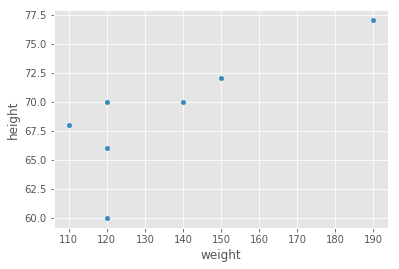

In [182]:
data.plot.scatter('weight', 'height')

## 5. Calculate BMI and save as a new column

In [183]:
data['BMI'] = data.height/data.weight
data

,id,sex,weight,height,BMI
0,1,M,190,77,0.405263
1,2,F,120,70,0.583333
2,3,F,110,68,0.618182
3,4,M,150,72,0.480000
4,5,O,120,66,0.550000
5,6,M,120,60,0.500000
6,7,F,140,70,0.500000


## 6. Save sheet as a new CSV file `hw_dataB.csv`

In [184]:
data.to_csv('hw_dataB.csv')

## Run the following

In [185]:
!cat hw_dataB.csv

,id,sex,weight,height,BMI
0,1,M,190,77,0.4052631578947368
1,2,F,120,70,0.5833333333333334
2,3,F,110,68,0.6181818181818182
3,4,M,150,72,0.48
4,5,O,120,66,0.55
5,6,M,120,60,0.5
6,7,F,140,70,0.5
